In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#Convert the text into numeric values.
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Read the dataset
df= pd.read_csv('../../../data/Autism_Spectrum_Disorder_Screening_Data_for _Toddlers_in_Saudi_Arabia_Data_Set.csv')

df.head()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Region,Family member with ASD history,Who is completing the test,Age,Gender,Screening Score,Class
0,0,0,1,1,1,0,0,0,0,0,Makkah Province,No,Family member,32,Female,3,0
1,0,0,1,0,0,1,0,1,0,0,Makkah Province,No,Family member,30,Female,3,0
2,0,0,0,1,0,0,0,0,0,0,Makkah Province,No,Family member,36,Male,1,0
3,0,0,0,0,0,0,0,0,0,0,Makkah Province,Yes,Family member,36,Female,0,0
4,0,0,0,0,0,0,0,0,0,0,Eastern Province,No,Family member,36,Female,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   A10                             506 non-null    int64 
 1   A9                              506 non-null    int64 
 2   A8                              506 non-null    int64 
 3   A7                              506 non-null    int64 
 4   A6                              506 non-null    int64 
 5   A5                              506 non-null    int64 
 6   A4                              506 non-null    int64 
 7   A3                              506 non-null    int64 
 8   A2                              506 non-null    int64 
 9   A1                              506 non-null    int64 
 10  Region                          506 non-null    object
 11  Family member with ASD history  506 non-null    object
 12  Who is completing the test      506 non-null    ob

Let's check for **missing values**

In [5]:
#check if there missing data or null
df.isnull().sum()

A10                               0
A9                                0
A8                                0
A7                                0
A6                                0
A5                                0
A4                                0
A3                                0
A2                                0
A1                                0
Region                            0
Family member with ASD history    0
Who is completing the test        0
Age                               0
Gender                            0
Screening Score                   0
Class                             0
dtype: int64

There are no missing values

In [6]:
#method to draw pie chart
def draw_pie_chart(feature_df): #feature_df is the value count series data for a particular feature
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')

    #create pie chart
    plt.pie(feature_df.values, labels = feature_df.index, colors = colors, autopct='%.0f%%')
    plt.show()

# Distribution of Class ( ASD or No ASD)

In [7]:
class_df = df.Class.value_counts()

In [8]:
class_df

1    341
0    165
Name: Class, dtype: int64

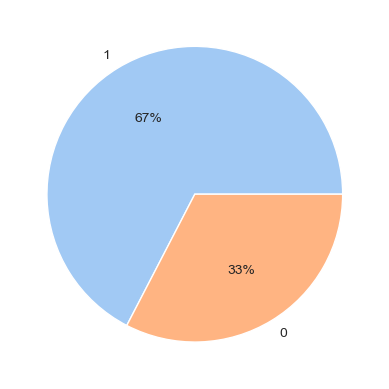

In [9]:
draw_pie_chart(class_df)

Majority of instances(~70%) are positive meaning the child has ASD. As such, this is a highly imbalanced dataset.

# Gender

Let's explore **gender** distribution of the children subjects

In [10]:
gender_df = df.Gender.value_counts()

In [11]:
gender_df

Female    349
Male      157
Name: Gender, dtype: int64

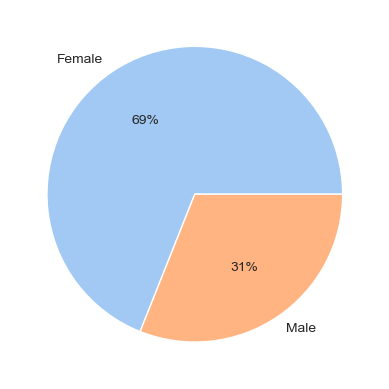

In [12]:
draw_pie_chart(gender_df)

The majority of subjects(~70%) are female children.

# Region

Let's explore the **region** of residence for these children

In [13]:
region_df = df.Region.value_counts()

In [14]:
region_df

Makkah Province              217
Riyadh Province               85
Eastern Province              50
Madinah Province              23
Qassim Province               22
Jizan Province                19
Tabuk Province                18
Ha'il Province                16
Northern Borders Province     15
Aseer Province                13
Al Jawf Province              12
Najran Province                9
Al Baha Province               7
Name: Region, dtype: int64

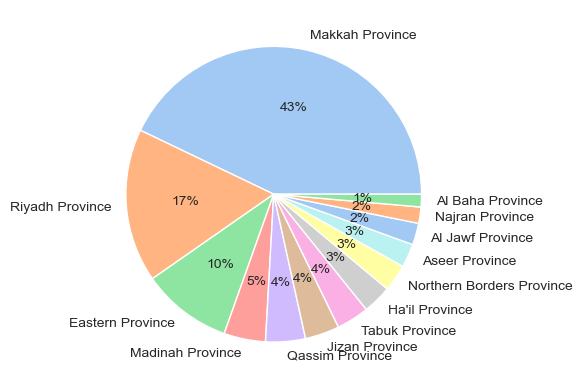

In [15]:
draw_pie_chart(region_df)

The largest number of cases come from the **Makkah** region followed by **Riyadh** and **Eastern** regions.

# Family members with ASD

In [16]:
fam_asd_df = df['Family member with ASD history'].value_counts()

In [17]:
fam_asd_df

No     384
Yes    122
Name: Family member with ASD history, dtype: int64

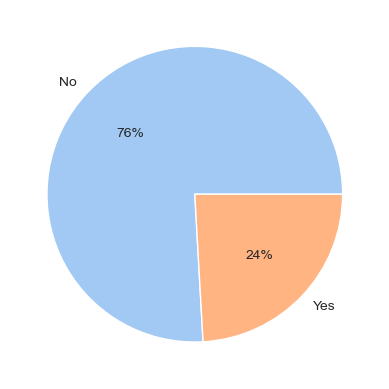

In [18]:
draw_pie_chart(fam_asd_df)

Majority of the children have no known family history of ASD

In [19]:
fam_asd_w_child_asd = df[df.Class == 1]['Family member with ASD history'].value_counts()

Let's check the family history of children with autism

In [20]:
fam_asd_w_child_asd

No     237
Yes    104
Name: Family member with ASD history, dtype: int64

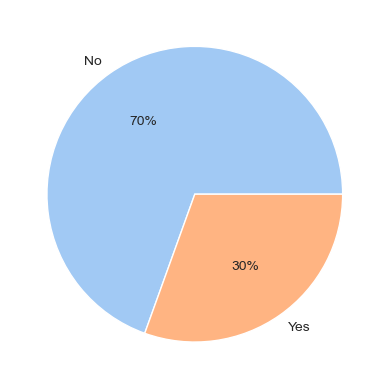

In [21]:
draw_pie_chart(fam_asd_w_child_asd)

family history with ASD is slightly **higher** for children with Austism

Let's check the family history of children with no autism

In [22]:
fam_asd_w_no_child_asd = df[df.Class == 0]['Family member with ASD history'].value_counts()

In [23]:
fam_asd_w_no_child_asd

No     147
Yes     18
Name: Family member with ASD history, dtype: int64

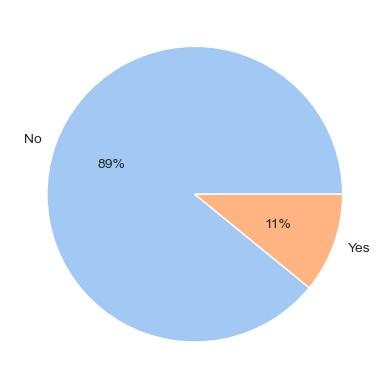

In [24]:
draw_pie_chart(fam_asd_w_no_child_asd)

family history with ASD is **quite lower** for children with no Austism. This short analysis into family history could indicate a **positive correlation between family history and autism in children**. However, only 30% of cases for ASD children have family ASD history and so family history may not be so influential a feature.

# Age Distribution of Children

In [25]:
age_df = df['Age'].value_counts()

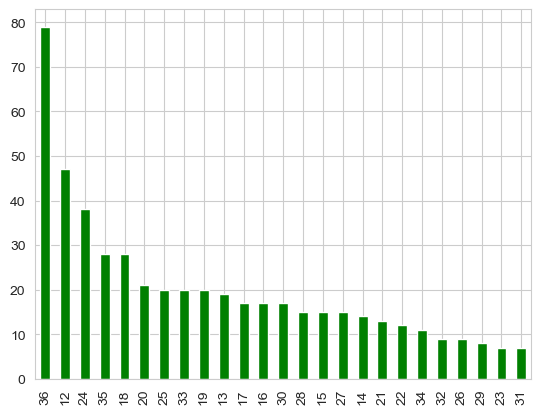

In [32]:
age_df.plot(kind='bar', color = 'green');

A plurality of parents take the questionnaires when the children are 36 months old or 3 years old followed by 12 months old(1 year old) and 24 months old(2 years old). This indicates guardians perform the checkups around their children's birthdays.

In [27]:
age_df_w_asd = df[df.Class == 1]['Age'].value_counts()

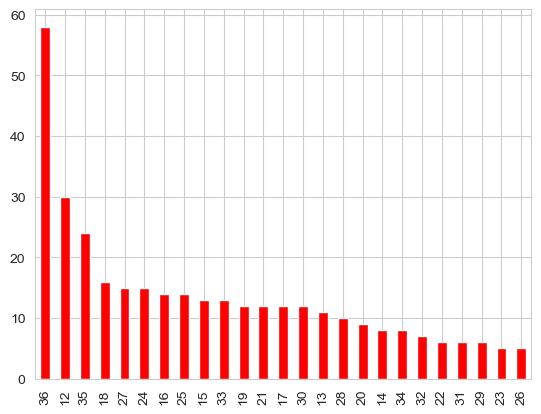

In [31]:
age_df_w_asd.plot(kind='bar', color = 'red');

Since a plurality of parents test their children when they are 3 years old or 1 year old, the detection of ASD is also more prevalent around that time period. 

# Heatmap correlation

In order to determine correlation between ASD class and gender/region/family history, these 3 variables need to be converted to numeric values 

In [29]:
df_numeric = df.copy()
le_Species = LabelEncoder()
df_numeric['Family member with ASD history'] = le_Species.fit_transform(df_numeric['Family member with ASD history'])
df_numeric['Gender'] = le_Species.fit_transform(df_numeric['Gender'])
df_numeric['Region'] = le_Species.fit_transform(df_numeric['Region'])

C:\Users\kmedr\AppData\Local\Temp\ipykernel_5952\2117061897.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df_numeric.corr()


Text(0.5, 1.0, 'Correlation')

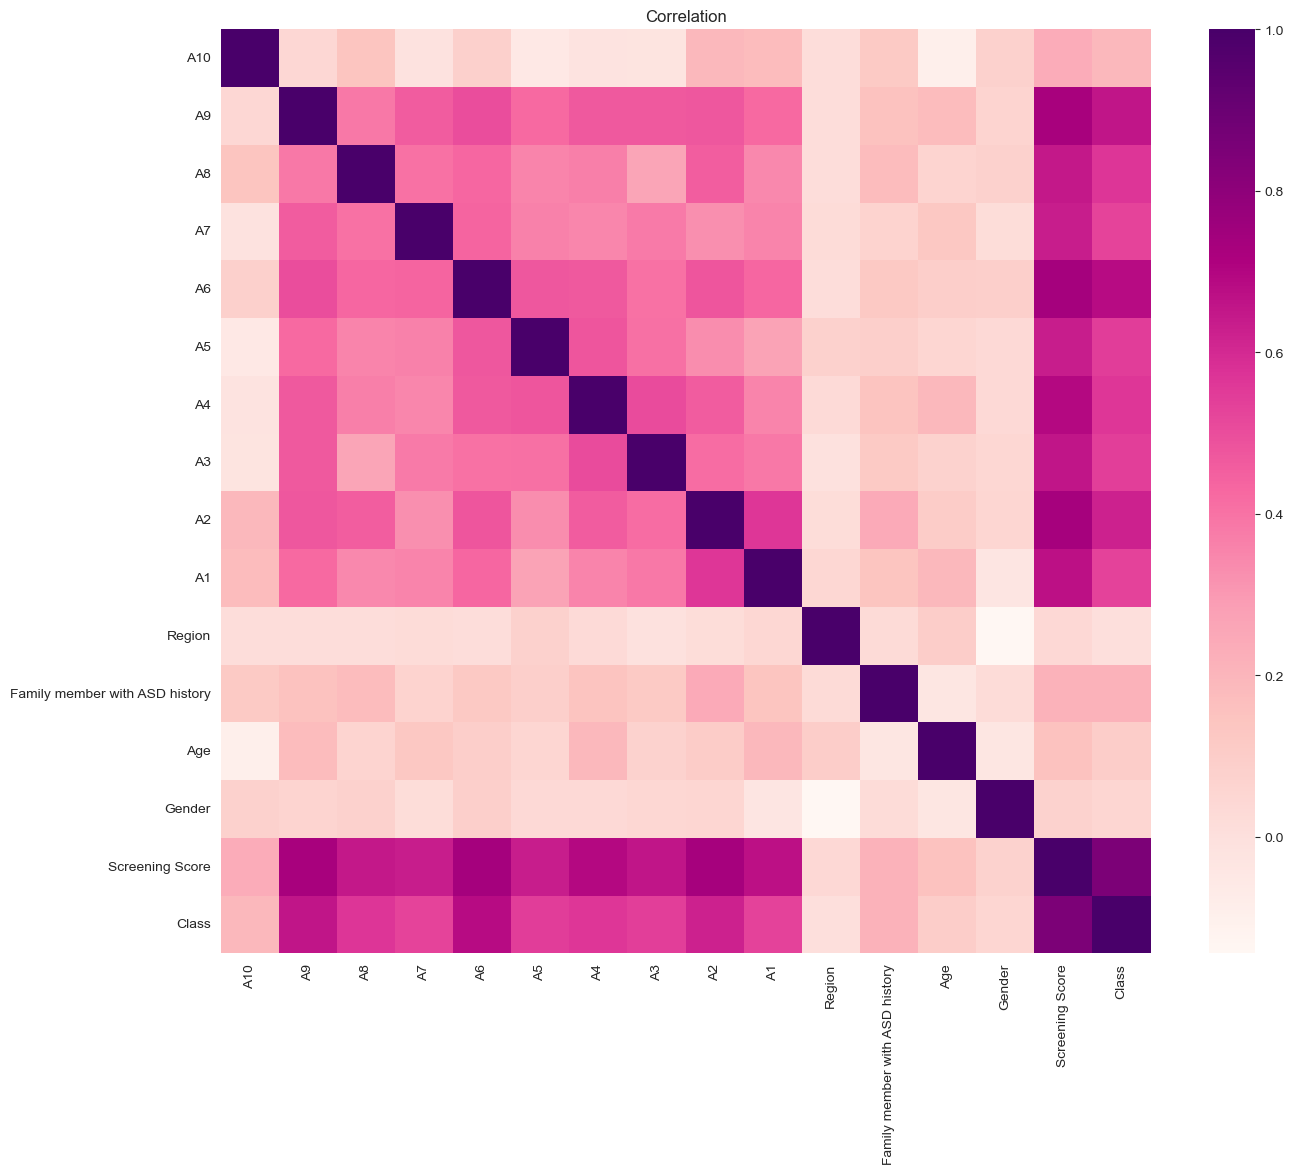

In [30]:
correlation=df_numeric.corr()
fig=plt.figure(figsize=(15,12))
r=sns.heatmap(correlation,cmap="RdPu")
r.set_title("Correlation")

It seems region, family history, age, gender are **not important** for determining ASD in children. Among the main features (A1-A10), **A9,A6, and A2** are the most important features. Inter-correlation among these 10 features hovers around 0.4